# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

In [6]:
import matplotlib.pyplot as plt

In [7]:
reshaped = X[36000].reshape(28,28)

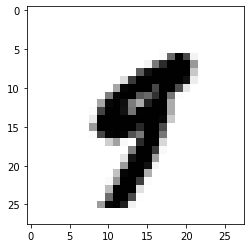

In [8]:
plt.imshow(reshaped, cmap = plt.cm.binary, interpolation = 'nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [9]:
y[36000]

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [10]:
X_train = X[:60000,]
X_test = X[60000:,]
y_train = y[:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [11]:
# using np.where I will get a column with 1 if there is a 5 and a 0 if not.
y_train_5 = np.where(y_train=='5', 1, 0)
y_test_5 = np.where(y_test=='5',1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [13]:
lr_model.fit(X_train, y_train_5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Does the classifier predict correctly the 36000th digit we picked before?

In [16]:
# the 36000th will be 30000 as the first 6000 where for training.
y_predicted = lr_model.predict(X_test)

In [ ]:
# As the 36000th value was nine, and not a 5, getting a 0 means it is well predicted.

#### The 35th value is a 5. Check if it was correctly predicted.

In [ ]:
y_test_5[35]

In [ ]:
y_predicted[35]

In [ ]:
# if we focused on 35th value of test subset, it is correctly predicted although it is 
# not a 5.

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [15]:
# Libraries
from sklearn.base import BaseEstimator

In [17]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [18]:
never_5_clf.fit(X_train)

In [19]:
dumb_predicted = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [33]:
lr_model_confusion = confusion_matrix(y_test_5, y_predicted)
precision = precision_score(y_test_5, y_predicted)
recall = recall_score(y_test_5, y_predicted)
f1_score_lr = f1_score(y_test_5, y_predicted)

In [34]:
lr_model_confusion

array([[9026,   82],
       [ 145,  747]])

In [35]:
precision

0.9010856453558505

In [36]:
recall

0.8374439461883408

In [40]:
f1_score_lr

0.8680999418942476

In [41]:
dumb_confusion = confusion_matrix(y_test_5, dumb_predicted)
dumb_precision = precision_score(y_test_5, dumb_predicted)
dumb_recall = recall_score(y_test_5, dumb_predicted)

In [42]:
dumb_f1_score = f1_score(y_test_5, dumb_predicted)

In [43]:
dumb_confusion

array([[9108,    0],
       [ 892,    0]])

In [44]:
dumb_precision

0.0

In [45]:
dumb_recall

0.0

#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# The Logistic Regression model works quite good, having Precision, Recall and F1_score
# over 0.8
# The dumb model is not good. Taking a look at the confusion matrix and seeing there are
# two zeros in the second column means that there are no True Positives neither 
# False Positives

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [65]:
# second element of roc_curve is not our predictions, but probability estimates
from sklearn.metrics import roc_curve, roc_auc_score

# the predict_proba gives us a column with the probability of having that result in each
# row. In our case, first column will be the probability of being a 0 and the second one
# the probability of being 1. That's why we need to choose second column of estimates.

estimates = lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_5, estimates)

estimates_dumb = np.zeros((len(X_test), 1))[:, 0]
fpr_dumb, tpr_dumb, thresholds_dumb = roc_curve(y_test_5, estimates_dumb)

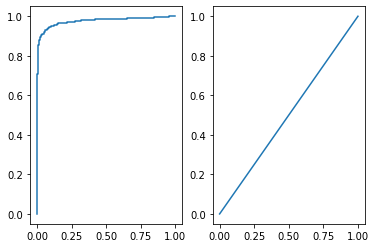

In [67]:
f, ax = plt.subplots(1,2)

ax[0].plot(fpr_lr, tpr_lr)
ax[1].plot(fpr_dumb, tpr_dumb)

plt.show()


#### Now find the roc_auc_score for each. 

In [68]:
lr_auc = roc_auc_score(y_test_5, y_predicted)
dumb_auc = roc_auc_score(y_test_5, dumb_predicted)

print('roc_auc_score for LR model is:', lr_auc)
print('roc_auc_score for Dumb model is:', dumb_auc)

roc_auc_score for LR model is: 0.9142204359839378
roc_auc_score for Dumb model is: 0.5


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# This metric tells us that our LR model works pretty well, while the dumb model is
# the worst case.